# Week 4 Exercise Cluster on Spending Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import data
import pandas as pd
df = pd.read_csv('spending.csv')
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
df.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [5]:
#Put data into X to work with
x_columns = 2
X = df.iloc[:,0:x_columns].values

In [6]:
#Import KMeans cluster model and initially investigate 2 clusters 
from sklearn.cluster import KMeans
spend_model = KMeans(n_clusters = 2, random_state = 0).fit(X)
print('Cluster model K=2 inertia score is: ',spend_model.inertia_)
centers = spend_model.cluster_centers_
print(centers)

Cluster model K=2 inertia score is:  181363.59595959596
[[79.6        50.12727273]
 [37.28888889 50.28888889]]


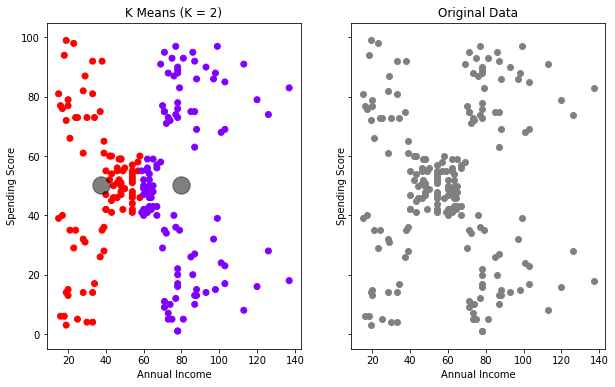

In [7]:
#Plot Clustered and Original data to visualize 2 clusters vs the data as a whole
fig,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (10,6))

#fitted for KMeans
ax1.set_title('K Means (K = 2)')
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Spending Score')
ax1.scatter(X[:,0],X[:,1],c = spend_model.labels_, cmap = 'rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 1], color = 'black', s = 300, alpha = 0.5)

#original data
ax2.set_title('Original Data')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')
ax2.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color = 'grey')

# Search for Optimum number of clusters 

In [8]:
#Loop through clusters from 1 to 10 and stores scores for plotting
model_score =[]
for num_cluster in range (1,11,1):
    spend_model = KMeans(n_clusters = num_cluster, random_state = 0).fit(X)
    model_score.append(spend_model.inertia_)

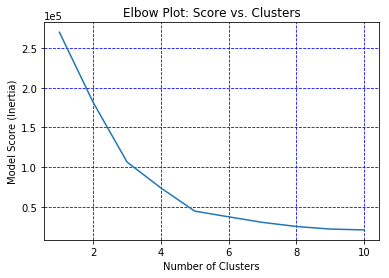

In [9]:
#Plot cluster score (Inertia) vs number of clusters on an elbow plot
plt.plot(range(1,11,1), model_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Model Score (Inertia)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.title('Elbow Plot: Score vs. Clusters')
plt.grid(b=True, which='major', color='b', linestyle='--')


In [10]:
#Select 5 Clusters as optimal from the elbow
spend_model = KMeans(n_clusters = 5, random_state = 0).fit(X)
print('Cluster model K=2 inertia score is: ',spend_model.inertia_)
centers = spend_model.cluster_centers_
print(centers)

Cluster model K=2 inertia score is:  44448.45544793371
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


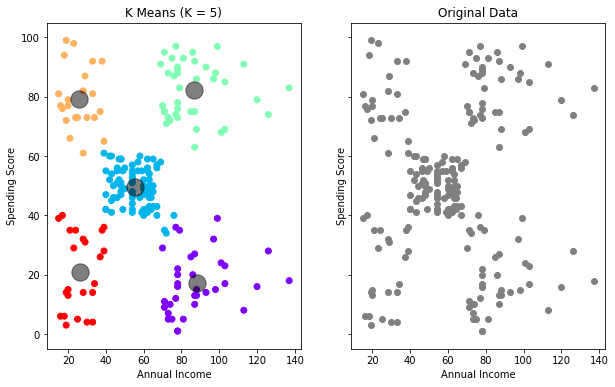

In [11]:
#Replot comparison chart set with 5 clusters vs original unclustered data
fig5,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (10,6))

#fitted for KMeans
i = 5
title = 'K Means (K = '+ str(i)+')'
ax1.set_title(title)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Spending Score')
ax1.scatter(X[:,0],X[:,1],c = spend_model.labels_, cmap = 'rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 1], color = 'black', s = 300, alpha = 0.5)

#original data
ax2.set_title('Original Data')
ax2.set_xlabel('Annual Income')
ax2.set_ylabel('Spending Score')
ax2.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color = 'grey')

In [12]:
#Explore 10 Clusters to see how KMeans behaves.
spend_model = KMeans(n_clusters = 10, random_state = 0).fit(X)
print('Cluster model K=2 inertia score is: ',spend_model.inertia_)
centers = spend_model.cluster_centers_
print(centers)

Cluster model K=2 inertia score is:  20736.679938924124
[[ 82.38888889  90.44444444]
 [ 28.18181818  33.27272727]
 [ 63.95238095  46.21428571]
 [ 84.46428571  15.32142857]
 [ 25.0952381   80.04761905]
 [ 77.78571429  73.28571429]
 [ 47.86046512  51.97674419]
 [ 24.58333333   9.58333333]
 [114.71428571  78.42857143]
 [124.          17.5       ]]


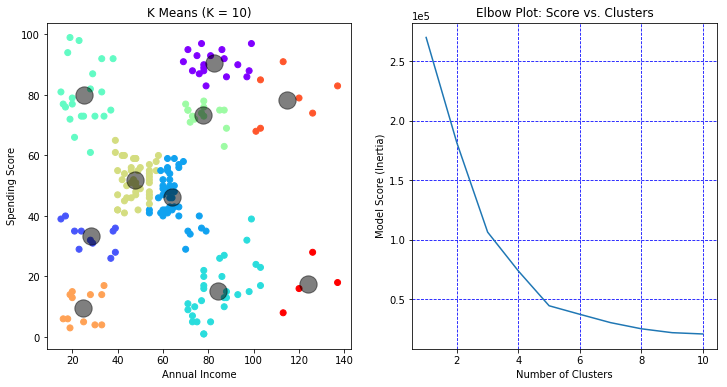

In [13]:
#PLot 10 clusters with the elbow plot
fig6,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = (12,6))

#fitted for KMeans
i = 10
title = 'K Means (K = '+ str(i)+')'
ax1.set_title(title)
ax1.set_xlabel('Annual Income')
ax1.set_ylabel('Spending Score')
ax1.scatter(X[:,0],X[:,1],c = spend_model.labels_, cmap = 'rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 1], color = 'black', s = 300, alpha = 0.5)

ax2.plot(range(1,11,1), model_score)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Model Score (Inertia)')
ax2.set_title('Elbow Plot: Score vs. Clusters')
ax2.grid(b=True, which='major', color='b', linestyle='--')

# explore dynamic charts - Loop through 1 to 10 clusters and save model, score and centers for animated plotting

In [14]:
#Run K range again, and save scores, labels, models, and centers 
model_score =[]
model_labels_ = []
spend_models = []
model_centers = []
for num_cluster in range (1,11,1):
    spend_model = KMeans(n_clusters = num_cluster, random_state = 0).fit(X)
    spend_models.append(spend_model)
    model_score.append(spend_model.inertia_)
    model_labels_.append(spend_model.labels_)
    model_centers.append(spend_model.cluster_centers_)


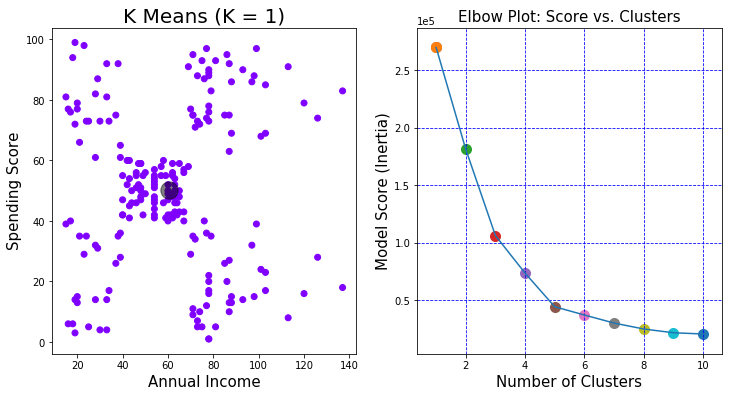

In [15]:
#Animation of clusters by color and corresponding cluster point on the elbow plot.
#Centroids will remain.  Option is to plot over with white pior to next iteration, but 
#a ghost image remains. This goes away with reflect animation
#Clearing the figure using ax1.cla() at the start of each iteration clears the centroids,
#but this erases both axis, so axis have to be reploted on each iteration.

#Import animation library 
import matplotlib.animation
import numpy as np

#Adjust figure size to compensate for compression in the animation window
fig_j,(ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = False, figsize = (12,6))


#define k to avoid an error
k=9

#Plot fixed items for Elbow plot
ax2.plot(range(1,11,1), model_score)
ax2.set_xlabel('Number of Clusters', size = 15)
ax2.set_ylabel('Model Score (Inertia)',size = 15)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_title('Elbow Plot: Score vs. Clusters',size = 15)
ax2.grid(b=True, which='major', color='b', linestyle='--')

#Define animation function with animated plotting items varying with k number of clusters
#k iterates from 0 to 9 to align with index in lists (k=1 has index 0).  
#Add 1 to k for title & elbow plot x axis 
def animate(k):
    #use cla() to erase centroids from previous iteration, then replot axis labels
    ax1.cla()
    ax1.set_xlabel('Annual Income',size = 15)
    ax1.set_ylabel('Spending Score',size = 15)
    #nul_centers = model_centers[k-1]
    #ax1.scatter(x=nul_centers[:, 0], y=nul_centers[:, 1], color = 'white', s = 300, alpha = 1.0)
    #Change title for k aligning with plot
    title = 'K Means (K = '+ str(k+1) +')'
    ax1.set_title(title,size = 20)
    #Select centers and plot for k clusters, clustered data by color label
    centers = model_centers[k]
    ax1.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c = model_labels_[k], cmap = 'rainbow')
    ax1.scatter(x=centers[:, 0], y=centers[:, 1], color = 'black', s = 300, alpha = 0.5)
    #Plot next k cluster marker on elbow plot
    ax2.scatter(x=k+1,y=model_score[k], s=100)

#Run animation
ani = matplotlib.animation.FuncAnimation(fig_j, animate, frames=range(0,10), interval=1500, repeat_delay=1000)

#Import HTML Display to view in the Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())   